In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use('seaborn-white')

from datetime import datetime

In [2]:
# Import the Dataset
selected_month = pd.read_csv('2020-Feb.csv.gz', compression='gzip',
                   error_bad_lines=False)
selected_month.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-02-01 00:00:00 UTC,view,100010426,2232732115290555244,apparel.shoes,NaN,19.31,581521975,82d5664d-7980-43e1-ab27-a2f05e991760
1,2020-02-01 00:00:00 UTC,view,100071077,2232732079706079299,sport.bicycle,crown,11.88,596313635,3df590c0-e667-4f5a-aa87-f47749cd6408
2,2020-02-01 00:00:00 UTC,view,1004665,2232732093077520756,construction.tools.light,samsung,838.23,608821035,3e271f43-db51-46bd-b215-c2907ed1a204
3,2020-02-01 00:00:01 UTC,view,1002544,2232732093077520756,construction.tools.light,apple,410.42,530488542,21f46782-fb36-4d5c-82d4-6dc26ae93fad
4,2020-02-01 00:00:01 UTC,view,100010151,2053013563835941749,appliances.kitchen.refrigerators,pulser,332.03,583795643,eddfe0e2-12f8-4357-b453-00786c9b0319


In [3]:
selected_month.shape

(55318565, 9)

In [4]:
selected_month.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

QUESTION 3:

            What is the brand whose prices are higher on average?

In [ ]:
# Select part of the dataset
Month = selected_month.iloc[:,1:7]
# drop the excess column
Month = Month.drop(columns=['event_type','product_id','category_id']) 
Month.head()

In [ ]:
# Group the column by category_code and brand and compute the average price
table = Month.groupby(['category_code','brand'], as_index=False)['price'].mean()
# rename the column
table = table.rename(columns={"price": "average_price"})
table

In [ ]:
# Split the "category_code" data in category and sub_category
table['category'], table['sub_category'] = table['category_code'].str.split('.', 1).str
table

In [ ]:
# Rearrange the Dataframe "table"
cols = table.columns.tolist()
cols = cols[-3:] + cols[:-3]
table = table[cols]
table

 - write a function that ask at the user a category in inputs

In [ ]:
# Function for plot the category code
def category_code_plot_avg_price(word):
                  
    table2 = table.loc[table['category_code'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the February average price of {word}.')
    plt.show()
    
    return ax


In [ ]:
# Function for plot the category
def category_plot_avg_price(word):
                  
    table2 = table.loc[table['category'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the February average price of {word}.')
    plt.show()
    
    return ax

In [ ]:
# Function for plot the sub_category
def subcategory_plot_avg_price(word):
                  
    table2 = table.loc[table['sub_category'] == word]
    plt.figure(figsize = (15,10))
    ax = plt.subplot()
    ax.barh(table2['brand'].head(40),
               table2['average_price'].head(40), 
               align = 'center', edgecolor = 'k')
    plt.axvline(table2['average_price'].mean(), c='red')
    plt.xlabel('Average Price')
    plt.ylabel('Brand')
    plt.title(f'Plot the February average price of {word}.')
    plt.show()
    
    return ax

In [ ]:
category_code_plot_avg_price('accessories.bag')

In [ ]:
category_plot_avg_price('accessories')

In [ ]:
subcategory_plot_avg_price('bag')

 - Find, for each categoty, the brand with the highest average price.

In [15]:
# Find the Category Object with the Maximum Price 
Max_Price = table.groupby(['category'], as_index=False)['average_price'].max()
Max_Price

,category,average_price
0,accessories,1789.171852
1,apparel,2252.310000
2,appliances,2558.259756
3,auto,2290.920000
4,computers,2211.547893
5,construction,2470.850000
6,country_yard,913.790000
7,electronics,2540.929286
8,furniture,2522.590000
9,kids,1914.641855


In [16]:
# Merge the two dataset
merge_dataset = Max_Price.merge(table, on='average_price')
# Select only conversion rate and sort in decring order
Merge_dataset = merge_dataset.drop(columns=['category_y'])
# rename the column
Merge_dataset = Merge_dataset.rename(columns={"category_x": "category", "average_price":"Max_price"})
Dataset_ascending = Merge_dataset.sort_values(by='Max_price', ascending=False, inplace=False)
Dataset_ascending

,category,Max_price,sub_category,category_code,brand
2,appliances,2558.259756,kitchen.toster,appliances.kitchen.toster,pinarello
8,electronics,2540.929286,camera.photo,electronics.camera.photo,sony
9,furniture,2522.590000,kitchen.table,furniture.kitchen.table,active
6,construction,2470.850000,tools.painting,construction.tools.painting,zipp
12,sport,2372.000000,ski,sport.ski,kessler
3,auto,2290.920000,accessories.winch,auto.accessories.winch,femi
4,auto,2290.920000,kitchen.table,furniture.kitchen.table,unifur
1,apparel,2252.310000,underwear,apparel.underwear,uta
5,computers,2211.547893,peripherals.printer,computers.peripherals.printer,sony
10,kids,1914.641855,skates,kids.skates,volta


QUESTION 5:

            In what part of the day is your store most visited?

In [17]:
# Select part of the dataset
Month = selected_month.iloc[:,0:5]
Month = Month.drop(columns=['product_id','category_id'])
Month.head()

,event_time,event_type,category_code
0,2020-02-01 00:00:00 UTC,view,apparel.shoes
1,2020-02-01 00:00:00 UTC,view,sport.bicycle
2,2020-02-01 00:00:00 UTC,view,construction.tools.light
3,2020-02-01 00:00:01 UTC,view,construction.tools.light
4,2020-02-01 00:00:01 UTC,view,appliances.kitchen.refrigerators


In [18]:
Month.shape

(55318565, 3)

In [19]:
# Transform the data event_time in datatime
Month.event_time = pd.to_datetime(Month.event_time)

In [20]:
# Hour Visitor
Hour = Month.resample('H', on='event_time').event_type.count()
print(Hour)

event_time
2020-02-01 00:00:00+00:00    14454
2020-02-01 01:00:00+00:00    24310
2020-02-01 02:00:00+00:00    43825
2020-02-01 03:00:00+00:00    71862
2020-02-01 04:00:00+00:00    99028
                             ...  
2020-02-29 19:00:00+00:00    27045
2020-02-29 20:00:00+00:00    30562
2020-02-29 21:00:00+00:00    17797
2020-02-29 22:00:00+00:00    10528
2020-02-29 23:00:00+00:00     8421
Freq: H, Name: event_type, Length: 696, dtype: int64


In [21]:
# Days Visitor
Day = Month.resample('D', on='event_time').event_type.count()
print(Day)

event_time
2020-02-01 00:00:00+00:00    2427889
2020-02-02 00:00:00+00:00    2157915
2020-02-03 00:00:00+00:00    1827998
2020-02-04 00:00:00+00:00    1744709
2020-02-05 00:00:00+00:00    1755855
2020-02-06 00:00:00+00:00    1761374
2020-02-07 00:00:00+00:00    1860491
2020-02-08 00:00:00+00:00    1706823
2020-02-09 00:00:00+00:00    1835024
2020-02-10 00:00:00+00:00    1895265
2020-02-11 00:00:00+00:00    2059805
2020-02-12 00:00:00+00:00    2695049
2020-02-13 00:00:00+00:00    2488984
2020-02-14 00:00:00+00:00    2134544
2020-02-15 00:00:00+00:00    2116283
2020-02-16 00:00:00+00:00    2461332
2020-02-17 00:00:00+00:00    2081401
2020-02-18 00:00:00+00:00    2118508
2020-02-19 00:00:00+00:00    2079330
2020-02-20 00:00:00+00:00    2117572
2020-02-21 00:00:00+00:00    1871924
2020-02-22 00:00:00+00:00    1944475
2020-02-23 00:00:00+00:00    1950421
2020-02-24 00:00:00+00:00    1862303
2020-02-25 00:00:00+00:00    1848274
2020-02-26 00:00:00+00:00    1912734
2020-02-27 00:00:00+00:00  

In [22]:
# Weak Visitor (starting on monday)
Week_Mon = Month.resample('W-MON', on='event_time').event_type.count()
print(Week_Mon)

event_time
2020-02-03 00:00:00+00:00     6413802
2020-02-10 00:00:00+00:00    12559541
2020-02-17 00:00:00+00:00    16037398
2020-02-24 00:00:00+00:00    13944533
2020-03-02 00:00:00+00:00     6363291
Freq: W-MON, Name: event_type, dtype: int64


In [23]:
# group the vistior's view with a range of 3H
Hour_6 = Month.resample('6H', on='event_time').event_type.count()
Hour_6 = pd.DataFrame(Hour_6)
Hour_6

,event_type
event_time,
2020-02-01 00:00:00+00:00,370659
2020-02-01 06:00:00+00:00,836845
2020-02-01 12:00:00+00:00,893686
2020-02-01 18:00:00+00:00,326699
2020-02-02 00:00:00+00:00,330714
...,...
2020-02-28 18:00:00+00:00,177573
2020-02-29 00:00:00+00:00,241821
2020-02-29 06:00:00+00:00,455053


In [24]:
# show in decresing order the view 3H (head)
Hour_6.sort_values(by='event_type', ascending=False, inplace=False).head(15)

,event_type
event_time,
2020-02-12 12:00:00+00:00,1003265
2020-02-12 06:00:00+00:00,942731
2020-02-16 06:00:00+00:00,942224
2020-02-13 12:00:00+00:00,895277
2020-02-01 12:00:00+00:00,893686
2020-02-13 06:00:00+00:00,872512
2020-02-01 06:00:00+00:00,836845
2020-02-16 12:00:00+00:00,830029
2020-02-02 06:00:00+00:00,783952


In [25]:
# show in decresing order the view 3H (tail)
Hour_6.sort_values(by='event_type', ascending=False, inplace=False).tail(15)

,event_type
event_time,
2020-02-05 18:00:00+00:00,240436
2020-02-06 18:00:00+00:00,238455
2020-02-10 18:00:00+00:00,236760
2020-02-26 18:00:00+00:00,232612
2020-02-03 18:00:00+00:00,230463
2020-02-25 18:00:00+00:00,229931
2020-02-04 18:00:00+00:00,206205
2020-02-28 18:00:00+00:00,177573
2020-02-29 18:00:00+00:00,168418


In [26]:
# Create the daily view with the average hour view
Hour_df = pd.DataFrame(Hour)
Hour_df.reset_index(inplace=True)
Hours = Hour_df.resample('D', on='event_time').event_type.mean()
# Create a dataframe 
Hours_df = pd.DataFrame(Hours)
Hours_df.reset_index(inplace=True)
# Add the column value
Hours_df= Hours_df.rename(columns={'event_type': 'avg_hour_count'})
# add a columns with only the numbers of days
Hours_df['days'] = [1,2,3,4,5,6,7,8,9,10,
               11,12,13,14,15,16,17,18,19,
               20,21,22,23,24,25,26,27,28,29]
Hours_df

,event_time,avg_hour_count,days
0,2020-02-01 00:00:00+00:00,101162.041667,1
1,2020-02-02 00:00:00+00:00,89913.125000,2
2,2020-02-03 00:00:00+00:00,76166.583333,3
3,2020-02-04 00:00:00+00:00,72696.208333,4
4,2020-02-05 00:00:00+00:00,73160.625000,5
5,2020-02-06 00:00:00+00:00,73390.583333,6
6,2020-02-07 00:00:00+00:00,77520.458333,7
7,2020-02-08 00:00:00+00:00,71117.625000,8
8,2020-02-09 00:00:00+00:00,76459.333333,9
9,2020-02-10 00:00:00+00:00,78969.375000,10


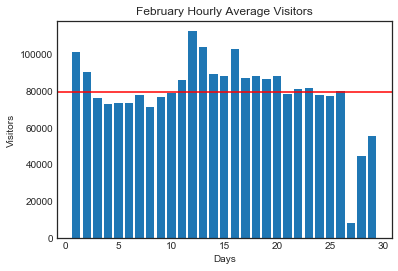

In [38]:
plt.figure()
plt.bar(Hours_df['days'],Hours_df['avg_hour_count'])
plt.axhline(Hours_df['avg_hour_count'].mean(), c='red')
plt.title('February Hourly Average Visitors')
plt.xlabel('Days')
plt.ylabel('Visitors')
plt.show()

QUESTION 6:

            What is the conversion rate of your store?

 - Find the overall conversion rate

In [3]:
# Select part of the dataset
Month = selected_month.iloc[:,1:6]
Month = Month.drop(columns=['brand'])
Month

,event_type,product_id,category_id,category_code
0,view,100010426,2232732115290555244,apparel.shoes
1,view,100071077,2232732079706079299,sport.bicycle
2,view,1004665,2232732093077520756,construction.tools.light
3,view,1002544,2232732093077520756,construction.tools.light
4,view,100010151,2053013563835941749,appliances.kitchen.refrigerators
...,...,...,...,...
55318560,view,100118024,2232732099436085763,construction.tools.welding
55318561,view,12200332,2053013553325015316,appliances.kitchen.toster
55318562,view,6902464,2232732078733000751,electronics.telephone
55318563,view,100103966,2053013560530830019,electronics.camera.video


In [4]:
# Count the number of the event type in the dataset
count = Month['event_type'].value_counts() 
# Transform the result in array
count = np.array(count)
# Find the Overall Conversion Rate
Overall_cr = count[2] / count[0] * 100
Overall_cr

2.342817626776384

 - Plot the number of purchase per each category and show the conversion rate

In [5]:
#Groupby by the event type and the category code
table = Month.groupby(['category_code','event_type'], as_index=False).count()
# Fix the dataframe
table = table.rename(columns={"product_id": "count"})
table = table.iloc[:,0:3]
table

,category_code,event_type,count
0,accessories.bag,cart,15744
1,accessories.bag,purchase,4777
2,accessories.bag,view,697457
3,accessories.umbrella,cart,951
4,accessories.umbrella,purchase,251
...,...,...,...
405,sport.trainer,purchase,6389
406,sport.trainer,view,779243
407,stationery.cartrige,cart,1032
408,stationery.cartrige,purchase,296


In [6]:
# Selection only purchase value
purchase = table[table['event_type'] == 'purchase']
# Number of purchase in decresing order
purchase_sort = purchase.sort_values(by='count', ascending=False, inplace=False)
purchase_sort

,category_code,event_type,count
258,construction.tools.light,purchase,589861
390,sport.bicycle,purchase,72141
315,electronics.clocks,purchase,39216
163,appliances.personal.massager,purchase,37239
40,apparel.shoes,purchase,30326
...,...,...,...
217,computers.components.sound_card,purchase,5
235,computers.peripherals.keyboard,purchase,5
10,apparel.belt,purchase,5
181,auto.accessories.light,purchase,4


In [7]:
# Selection only view value
view = table[table['event_type'] == 'view']
# Merge Purchase and View Dataset
Merge = purchase.merge(view, on='category_code')
Merge = Merge.rename(columns={"category_x": "count"})
Merge

,category_code,event_type_x,count_x,event_type_y,count_y
0,accessories.bag,purchase,4777,view,697457
1,accessories.umbrella,purchase,251,view,67279
2,accessories.wallet,purchase,2403,view,209515
3,apparel.belt,purchase,5,view,555
4,apparel.costume,purchase,4835,view,373572
...,...,...,...,...,...
130,sport.ski,purchase,2368,view,229847
131,sport.snowboard,purchase,588,view,74678
132,sport.tennis,purchase,482,view,34096
133,sport.trainer,purchase,6389,view,779243


In [8]:
# Split the "category_code" data in category and sub_category
Merge['category'], Merge['sub_category'] = Merge['category_code'].str.split('.', 1).str
Merge = Merge.drop(columns=['sub_category', 'category_code']) 
Merge

,event_type_x,count_x,event_type_y,count_y,category
0,purchase,4777,view,697457,accessories
1,purchase,251,view,67279,accessories
2,purchase,2403,view,209515,accessories
3,purchase,5,view,555,apparel
4,purchase,4835,view,373572,apparel
...,...,...,...,...,...
130,purchase,2368,view,229847,sport
131,purchase,588,view,74678,sport
132,purchase,482,view,34096,sport
133,purchase,6389,view,779243,sport


In [9]:
Merge = Merge.groupby(['category','event_type_x','event_type_y'], as_index=False).sum()
Merge

,category,event_type_x,event_type_y,count_x,count_y
0,accessories,purchase,view,7431,974251
1,apparel,purchase,view,94136,6914392
2,appliances,purchase,view,143396,7913086
3,auto,purchase,view,8016,445525
4,computers,purchase,view,32231,2197633
5,construction,purchase,view,617290,14908555
6,country_yard,purchase,view,2354,163354
7,electronics,purchase,view,94561,5764236
8,furniture,purchase,view,37683,2660821
9,kids,purchase,view,16706,1410509


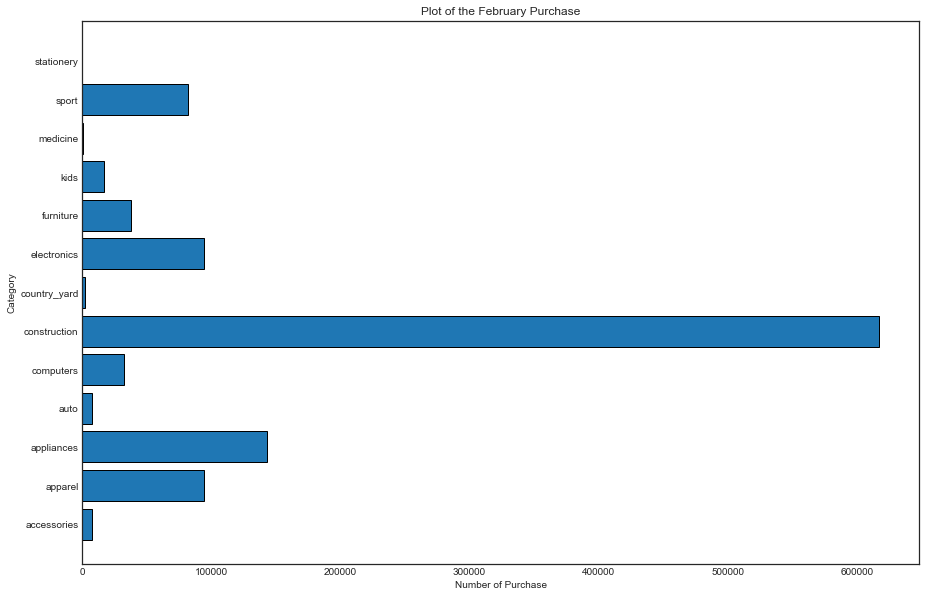

In [10]:
# Make a horizontal bar chart 
plt.figure(figsize = (15, 10))
ax = plt.subplot()
ax.barh(Merge['category'],
        Merge['count_x'], 
            align = 'center', edgecolor = 'k')
plt.xlabel('Number of Purchase')
plt.ylabel('Category')
plt.title('Plot of the February Purchase')
plt.show()

In [11]:
# Add the column 'conversion_rate'
Merge['conversion_rate'] = (Merge['count_x'] / Merge['count_y'])*100
Merge

,category,event_type_x,event_type_y,count_x,count_y,conversion_rate
0,accessories,purchase,view,7431,974251,0.762740
1,apparel,purchase,view,94136,6914392,1.361450
2,appliances,purchase,view,143396,7913086,1.812138
3,auto,purchase,view,8016,445525,1.799226
4,computers,purchase,view,32231,2197633,1.466623
5,construction,purchase,view,617290,14908555,4.140509
6,country_yard,purchase,view,2354,163354,1.441042
7,electronics,purchase,view,94561,5764236,1.640478
8,furniture,purchase,view,37683,2660821,1.416217
9,kids,purchase,view,16706,1410509,1.184395


In [12]:
# Select only conversion rate and sort in decring order
Merge = Merge.drop(columns=['event_type_x','count_x','event_type_y','count_y'])
Merge_dec = Merge.sort_values(by='conversion_rate', ascending=False, inplace=False)
Merge_dec

,category,conversion_rate
5,construction,4.140509
11,sport,2.622622
2,appliances,1.812138
3,auto,1.799226
7,electronics,1.640478
4,computers,1.466623
6,country_yard,1.441042
8,furniture,1.416217
1,apparel,1.361450
9,kids,1.184395


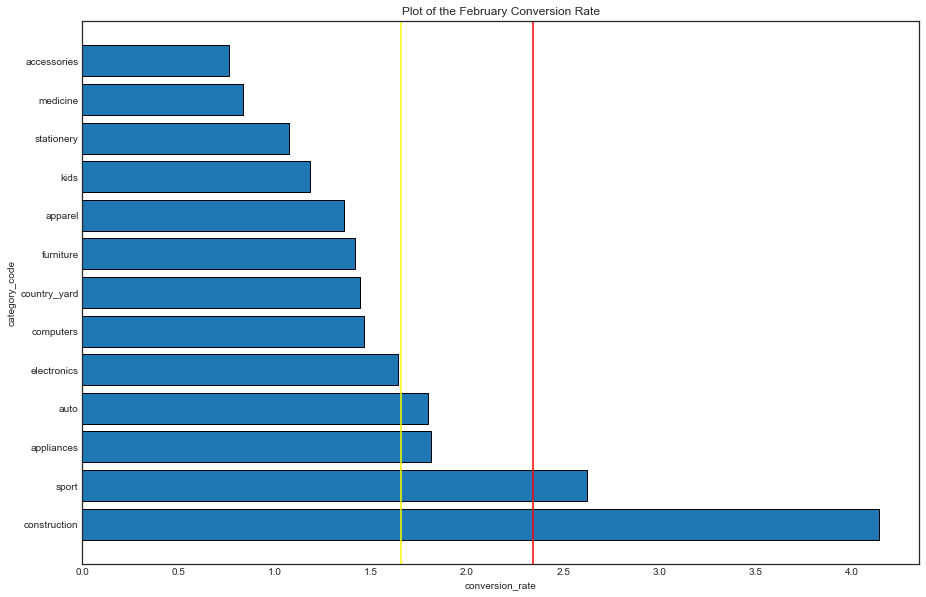

In [13]:
# Make a horizontal bar chart for the conversion rate 
plt.figure(figsize = (15,10))
ax = plt.subplot()
ax.barh(Merge_dec['category'],
        Merge_dec['conversion_rate'], 
            align = 'center', edgecolor = 'k')
plt.axvline(Overall_cr, c='red')
plt.axvline(Merge_dec['conversion_rate'].mean(), c='yellow')
plt.xlabel('conversion_rate')
plt.ylabel('category_code')
plt.title('Plot of the February Conversion Rate')
plt.show()

In [14]:
print(Merge_dec['conversion_rate'])

5     4.140509
11    2.622622
2     1.812138
3     1.799226
7     1.640478
4     1.466623
6     1.441042
8     1.416217
1     1.361450
9     1.184395
12    1.073592
10    0.837877
0     0.762740
Name: conversion_rate, dtype: float64
